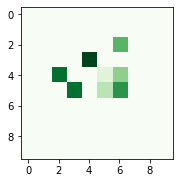

{'world_size': 10,
 'global_creature_id_counter': 8,
 'world_array': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
        [0., 0., 0., 0., 7., 0., 0., 0., 0., 0.],
        [0., 0., 6., 0., 0., 1., 3., 0., 0., 0.],
        [0., 0., 0., 6., 0., 2., 5., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 'carbon_dioxide_map': array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 4, 5, 5, 5],
        [5, 5, 5, 5, 4, 5, 5, 5, 5, 5],
        [5, 5, 3, 5, 5, 4, 4, 5, 5, 5],
        [5, 5, 5, 5, 5, 4, 4, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]),
 'plan

In [21]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.creature_rendering as creature_render
import visualization.array_rendering as ar

def photosynthesize(world_params):
    for plant_id in world_params['world_array'][np.nonzero(world_params['world_array'])]:
        world_params['plants'][int(plant_id) - 1][0][4] += 1
        x, y = np.argwhere(world_params['world_array'] == plant_id)[0]
        # TODO: Known bug, this will decrement carbon_dioxide in the wrong area
        # for any creature that occupies more than one space. The only way to solve this
        # That comes to mind is to have a plant_id and a segment or block id paired together
        # Will have to look into this tomorrow
        world_params['carbon_dioxide_map'][x][y] -= 1


world_params = { 'world_size': 10,
                 'global_creature_id_counter': 1 }

world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']))

world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                             fill_value=5)

sc.spawn_new_plants(world_params=world_params,
                             num_plants=7)

creature_render.place_creatures(world_params)

photosynthesize(world_params)

ar.render_array(world_params['world_array'])

world_params